In [5]:
#get papers for all companies using pymed library - and then rank order them to collect top 10 papers fro each company
import pandas as pd
import regex as re
#%pip install pymed
import numpy as np
from pymed import PubMed
pubmed_api_key = 'd3eec1f6d6ae8958046746ab8324ab97c608'


pubmed = PubMed(tool='PubMedSearcher', email='pari2798@gmail.com')
my_api_key = pubmed_api_key
pubmed.parameters.update({'api_key': my_api_key})


In [6]:
import hashlib
import requests


import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paritoshmacmini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df_comapnies = pd.read_csv('aging_companies/Aging Companies - Companies.csv')

# disease and other columns need cleaning up

In [35]:
df_comapnies_running = (df_comapnies[df_comapnies['operating status'] =='operating']).reset_index(drop=True)

In [36]:
df_comapnies_running['company_name'] = df_comapnies_running['[HOW TO USE THIS TABLE]\ncompany']

In [37]:
df_comapnies_running['diseases'] =df_comapnies_running['diseases / indications']

In [38]:
def remove_newline(x):
    return x.replace('\n','')
def remove_all_characters_afternon_alphabet(x):
    return re.sub(r'[^a-zA-Z]+', ' ', x)


df_comapnies_running['company_name'] = df_comapnies_running['company_name'].apply(remove_newline)
df_comapnies_running['company_name'] = df_comapnies_running['company_name'].apply(remove_all_characters_afternon_alphabet)

In [39]:
# do extra check if there is an empty string

In [40]:
def find_non_empty_string(x):
    list_of_strings = []
    for i in range(len(x)):
        if x[i] != '':
            list_of_strings.append([x[i],i])
        else:
            list_of_strings.append(['None',i])
    return list_of_strings
    



In [41]:
def find_none_stringindoublelist(x):
    list_of_strings = []
    for i in range(len(x)):
        if x[i][0] =='None':
            list_of_strings.append(x[i])
    return list_of_strings

In [42]:
df_comapnies_running['diseases']

0                                                 cancer
1                                  chronic would healing
2      AD, cancer, glaucoma,\nCVD, unspecificed orpha...
3                                            AD, PD, TBI
4                                      cancer, cosmetics
                             ...                        
145                           OA, eyeDs, neuroDs, lungDs
146                                                  NaN
147                                                  NaN
148                     PD, AD, ALS/FTLD, \nglioblastoma
149                                  hair loss, wrinkles
Name: diseases, Length: 150, dtype: object

In [43]:
"""" function to replce NaN in the list with None string"""
def replace_nan_with_none(x):
    for i in range(len(x)):
        if x[i] != x[i]:
            x[i] = ''
    return x

In [44]:
disease_list = replace_nan_with_none(df_comapnies_running['diseases'])

/var/folders/qh/mr12tldn3g76pnlklr517bsm0000gn/T/ipykernel_55602/3359128392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = ''


In [58]:
print(disease_list)

0                                                 cancer
1                                  chronic would healing
2      AD, cancer, glaucoma,\nCVD, unspecificed orpha...
3                                            AD, PD, TBI
4                                      cancer, cosmetics
                             ...                        
145                           OA, eyeDs, neuroDs, lungDs
146                                                     
147                                                     
148                     PD, AD, ALS/FTLD, \nglioblastoma
149                                  hair loss, wrinkles
Name: diseases, Length: 150, dtype: object


# remove newline, comma, slash, other and split the diseases 

In [57]:


""" remove newline, comma, slash, other and split the diseases """

' remove newline, comma, slash, other and split the diseases '

In [ ]:
comapny_list = list(set(df_comapnies_running['company_name'].tolist()))

In [46]:
len(comapny_list)

150

In [47]:
comapny_list[0]

'Fauna Bio'

In [48]:
""" function to combine two lists in to a list of tuples"""

def combine_two_lists_into_tuple(x,y):
    list_of_tuples = []
    for i in range(len(x)):
        list_of_tuples.append((x[i],y[i]))
    return list_of_tuples

In [49]:
combine_two_lists_into_tuple(comapny_list,disease_list)

[('Fauna Bio', 'cancer'),
 ('Fountain Therapeutics', 'chronic would healing'),
 ('IntraClear Biologics',
  'AD, cancer, glaucoma,\nCVD, unspecificed orphan pediatric disease'),
 ('GenFlow Biosciences', 'AD, PD, TBI'),
 ('Equator Therapeutics', 'cancer, cosmetics'),
 ('Oisin Bio OncoSenX ', ''),
 ('Elevian', ''),
 ('Genome Protection', 'IHD, T2D, CHF, scarless healing'),
 ('Tiaki Therapeutics', ''),
 ('Endogena Therapeutics', 'AD, cancer, Covid'),
 ('Intervene Immune', 'AD, FTD, cancer'),
 ('YouthBio Therapeutics', 'cancer, neuroDs, inflammation'),
 ('Altos Labs', 'AD, PD, (wet) AMD, ESRD MCI'),
 ('LyGenesis', 'AD, other MCI'),
 ('NavitorPharmaceuticals', ''),
 ('NemaLife Inc ', 'PD, AD'),
 ('Ridgeline Therapeutics', ''),
 ('Younger Phenotype', 'PD'),
 ('Altoida', 'neuroDs, CVD, others'),
 ('Samsara Therapeutics', 'cancer, progeroidDs,\nundecided agingDs'),
 ('Centaura', 'cancer'),
 ('BioChange ltd', ''),
 ('Ichor Life Sciences was Therapeutics ', 'muscleDs,\nimmuneDs, COVID-19'),
 ('Pr

In [124]:

def get_papers_of_company(company_name):

    try:


        company_name = company_name.lower()
        query_new = "{0}[Affiliation]".format(company_name)
        results = pubmed.query(query_new, max_results=500)
        article_list = []
        
        
        for article in results:
            try:
                article_id = article.pubmed_id.partition('\n')[0]
                title = article.title
                doi = article.doi
                authors = article.authors
                abstract = article.abstract
                journal = article.journal
                publication_date = article.publication_date
                try:

                # Extract and format information from the article
    
                    if article.keywords:
                        if None in article.keywords:
                            article.keywords.remove(None)
                        keywords = '", "'.join(article.keywords)
                    tuple_article = (company_name,article_id,title,keywords,publication_date,abstract,journal,doi,publication_date,authors)

                except:
                    keywords = []
                    
                    tuple_article = (company_name,article_id,title,keywords,publication_date,abstract,journal,doi,publication_date,authors)

            except:
                pass
            
            article_list.append(tuple_article)
    except:
        article_list.append((company_name,'None','None','None','None','None','None','None','None','None'))
    return article_list

""" convert a list of tuples into a dataframe"""
def convert_list_of_tuples_to_dataframe(list_of_tuples):
    df = pd.DataFrame(list_of_tuples, columns=['company_name','article_id','title','keywords','publication_date','abstract','journal','doi','publication_date','authors'])
    return df
        

In [127]:
""" function that takes a list of companies and returns a dataframe of all the papers for each company"""   

def get_papers_for_all_companies(list_of_companies):
    list_of_dataframes = []
    for company in list_of_companies:
        list_of_tuples = get_papers_of_company(company)
        df = convert_list_of_tuples_to_dataframe(list_of_tuples)
        list_of_dataframes.append(df)
        
    return (pd.concat(list_of_dataframes)).reset_index(drop=True)

In [128]:
df_papers_company_all1 = get_papers_for_all_companies(comapny_list[0:50])

In [138]:
df_papers_company_all1 = pd.read_csv('comapny_papers_0_50.csv', index_col=0)

In [142]:
df_papers_company_all2 = pd.read_csv('comapny_papers_50_100.csv', index_col=0)
df_papers_company_all3 = pd.read_csv('comapny_papers_100_149.csv', index_col=0)


In [ ]:
#df_papers_company_all2 = get_papers_for_all_companies(comapny_list[50:100])
#df_papers_company_all2.to_csv('comapny_papers_50_100.csv')
#df_papers_company_all3= get_papers_for_all_companies(comapny_list[100:149])
#df_papers_company_all3.to_csv('comapny_papers_100_149.csv')

In [143]:
final_df = pd.concat([df_papers_company_all1,df_papers_company_all2,df_papers_company_all3]).reset_index(drop=True)

In [145]:
final_df = final_df.drop_duplicates(subset=['article_id'])

In [147]:
final_df = final_df.drop(columns=['publication_date.1'])

In [149]:
final_df = final_df.reset_index(drop=True)

In [151]:
final_df['publication_date'] = pd.to_datetime(final_df['publication_date'])

In [154]:
""" function that removes all rows in datetime column that are before given year"""

def remove_rows_before_year(df,year):
    df_copy = df.copy(deep=True)
    df_copy = df_copy[df_copy['publication_date'].df_copy.year >= year]
    return df_copy

In [156]:
data_frame_2018_above_papers = (remove_rows_before_year(final_df,2018)).reset_index(drop=True)

In [158]:
data_frame_2018_above_papers.to_csv('post2018_agingcomapnies_papers.csv')

In [4]:
len(list(set(data_frame_2018_above_papers['company_name'])))

100

# cleaning up the data of publications
## 1 abstracts that contain less than 10 words are removed
## 2 titles that contain less than 5 words are removed
## 3 abstract or titles that cotnain word correction are removed
## 4 empty abstracts, titles are removed

In [5]:
data_frame_2018_above_papers = pd.read_csv('data/publications/post2018_agingcomapnies_papers.csv', index_col=0)
df = data_frame_2018_above_papers.copy(deep=True)

In [6]:
def remove_empty_rows(df, column):
    df_empty = df[df[column].isna()]
    df_nonempty = df[df[column].notna()]
    return df_empty, df_nonempty

df_noindex, df_report_nonempty_abs = remove_empty_rows(df, 'abstract')


In [8]:
df_report_nonempty_abs = df_report_nonempty_abs.reset_index(drop=True)

In [10]:
""" function that splits abstracts and removes abstracts that contain less than 10 words"""

def split_abstracts(df):
    df_copy = df.copy(deep=True)
    df_copy['abstract'] = df_copy['abstract'].str.split()
    df_copy = df_copy[df_copy['abstract'].str.len() >= 10]
    return df_copy

In [11]:
df = split_abstracts(df_report_nonempty_abs)

In [5]:
data_frame_2018_above_papers
#contains empty abstracts so remvoe all rows with empty abstracts or title or keywords

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi,authors
0,fauna bio,36420970,Microvesicle release from inner segments of he...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-11-25,Many inherited visual diseases arise from muta...,Disease models & mechanisms,10.1242/dmm.049871,"[{'lastname': 'Lewis', 'firstname': 'Tylor R',..."
1,fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-04-29,Behavioral genetics in dogs has focused on mod...,"Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...,"[{'lastname': 'Morrill', 'firstname': 'Kathlee..."
2,fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"ARE binding proteins"", ""AU-rich element (ARE)""...",2021-02-05,Hibernation is a physiological and behavioral ...,Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...,"[{'lastname': 'Fu', 'firstname': 'Rui', 'initi..."
3,fauna bio,32734172,Veterinary informatics: forging the future bet...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-08-01,This manuscript reviews the current state of v...,JAMIA open,10.1093/jamiaopen/ooaa005,"[{'lastname': 'Lustgarten', 'firstname': 'Jona..."
4,fauna bio,32569327,FasTag: Automatic text classification of unstr...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-06-23,Unstructured clinical narratives are continuou...,PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...,"[{'lastname': 'Venkataraman', 'firstname': 'Gu..."
...,...,...,...,...,...,...,...,...,...
3406,brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"ALSFRS-R"", ""amyotrophic lateral sclerosis"", ""b...",2021-12-11,Amyotrophic lateral sclerosis (ALS) is a fatal...,Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...,"[{'lastname': 'Cudkowicz', 'firstname': 'Merit..."
3407,brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"Acute respiratory distress syndrome"", ""COVID-1...",2021-01-21,One of the most severe complications of the cu...,Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...,"[{'lastname': 'Kaspi', 'firstname': 'Haggai', ..."
3408,brainstorm cell therapeutics,32808546,Effects of MSC-NTF cells on T and B regulatory...,"Acute respiratory distress syndrome"", ""COVID-1...",2020-08-19,NaN,Amyotrophic lateral sclerosis & frontotemporal...,10.1080/21678421.2020.1800747,"[{'lastname': 'Kern', 'firstname': 'Ralph', 'i..."
3409,brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"amyotrophic lateral sclerosis"", ""biomarkers"", ...",2020-01-04,Amyotrophic lateral sclerosis (ALS) is a debil...,Muscle & nerve,10.1002/mus.26801,"[{'lastname': 'Goyal', 'firstname': 'Namita A'..."


# check how many companies are there , how many publications per company and how many unique authors per comapny

In [13]:
len(set(df['company_name']))

97

In [7]:
(data_frame_2018_above_papers['company_name']).value_counts(10)

intraclear biologics       0.146585
centers for age control    0.145998
shift biosciences          0.145412
animal biosciences         0.144826
gero                       0.048666
                             ...   
bhb therapeutics           0.000293
longevity biotech          0.000293
lyceum pharmaceuticals     0.000293
yuva biosciences           0.000293
senisca                    0.000293
Name: company_name, Length: 100, dtype: float64

# get rid of empty rows and values

In [14]:
""" fumction to remove rows with empty abstracts or title or keywords"""    

def remove_rows_with_empty_abstracts(df):
    df_copy = df.copy(deep=True)
    df_copy = df_copy.dropna(subset=['abstract','title','keywords'])
    return df_copy

In [51]:
df

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi,authors
0,fauna bio,36420970,Microvesicle release from inner segments of he...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-11-25,"[Many, inherited, visual, diseases, arise, fro...",Disease models & mechanisms,10.1242/dmm.049871,"[{'lastname': 'Lewis', 'firstname': 'Tylor R',..."
1,fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-04-29,"[Behavioral, genetics, in, dogs, has, focused,...","Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...,"[{'lastname': 'Morrill', 'firstname': 'Kathlee..."
2,fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"ARE binding proteins"", ""AU-rich element (ARE)""...",2021-02-05,"[Hibernation, is, a, physiological, and, behav...",Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...,"[{'lastname': 'Fu', 'firstname': 'Rui', 'initi..."
3,fauna bio,32734172,Veterinary informatics: forging the future bet...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-08-01,"[This, manuscript, reviews, the, current, stat...",JAMIA open,10.1093/jamiaopen/ooaa005,"[{'lastname': 'Lustgarten', 'firstname': 'Jona..."
4,fauna bio,32569327,FasTag: Automatic text classification of unstr...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-06-23,"[Unstructured, clinical, narratives, are, cont...",PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...,"[{'lastname': 'Venkataraman', 'firstname': 'Gu..."
...,...,...,...,...,...,...,...,...,...
3215,brainstorm cell therapeutics,36113170,Evaluation of neurotrophic factor secreting me...,"Progressive multiple sclerosis"", ""biomarker"", ...",2022-09-17,"[Autologous, mesenchymal, stem, cell, neurotro...","Multiple sclerosis (Houndmills, Basingstoke, E...",10.1177/13524585221122156,"[{'lastname': 'Cohen', 'firstname': 'Jeffrey A..."
3216,brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"ALSFRS-R"", ""amyotrophic lateral sclerosis"", ""b...",2021-12-11,"[Amyotrophic, lateral, sclerosis, (ALS), is, a...",Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...,"[{'lastname': 'Cudkowicz', 'firstname': 'Merit..."
3217,brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"Acute respiratory distress syndrome"", ""COVID-1...",2021-01-21,"[One, of, the, most, severe, complications, of...",Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...,"[{'lastname': 'Kaspi', 'firstname': 'Haggai', ..."
3218,brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"amyotrophic lateral sclerosis"", ""biomarkers"", ...",2020-01-04,"[Amyotrophic, lateral, sclerosis, (ALS), is, a...",Muscle & nerve,10.1002/mus.26801,"[{'lastname': 'Goyal', 'firstname': 'Namita A'..."


In [52]:
df_clean_papers = remove_rows_with_empty_abstracts(df)

In [53]:
df_clean_papers = df_clean_papers.reset_index(drop=True)

In [54]:
len(set(df_clean_papers['company_name']))

97

In [23]:
df_clean_papers.to_csv('data_frame_2018_above_papers_clean.csv')

In [29]:
from collections import Counter
import seaborn as sns

def make_barplot(pdframe):
    pdframe = pd.DataFrame.from_dict(
        Counter(pdframe['company_name']), orient='index').reset_index()
    pdframe = pdframe.rename(columns = {'index': 'company_name',0:'Frequency'})
    pdframe = pdframe.dropna(axis=0)
    pdframe= pdframe.sort_values(by = ['Frequency'],ascending=False)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Frequency", y="company_name", data=pdframe.head(10))
    return ax

<AxesSubplot: xlabel='Frequency', ylabel='company_name'>

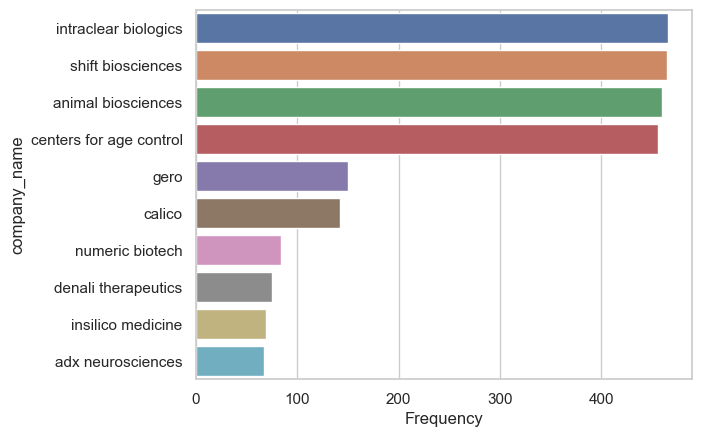

In [30]:
make_barplot(df_clean_papers)

# deal with the keywords and list of abstracts

In [55]:
""" convert abstract rows to a string with join """

def convert_abstracts_to_string(df):
    df_copy = df.copy(deep=True)
    df_copy['abstract'] = df_copy['abstract'].str.join(' ')
    return df_copy

In [56]:
df_clean_papers = convert_abstracts_to_string(df_clean_papers)

# create NER of Keywords and abstracts using following pipeline 

In [93]:


def clean_text(text):
  """Remove section titles and figure descriptions from text"""
  clean = "\n".join([row for row in text.split("\n") if (len(row.split(" "))) > 3 and not (row.startswith("(a)"))
                    and not row.startswith("Figure")])
  return clean

text = df_clean_noauthors['abstract'][10]
ctext = clean_text(text)
sentences = nltk.tokenize.sent_tokenize(ctext)

def query_plain(text, url="http://bern2.korea.ac.kr/plain"):
    return requests.post(url, json={'text': str(text)}).json()

entity_list = []
# The last sentence is invalid
for s in sentences:
  entity_list.append(query_plain(s))

parsed_entities = []
for entities in entity_list:
  e = []
  # If there are not entities in the text
  if not entities.get('annotations'):
    parsed_entities.append({'text':entities['text'], 'text_sha256': hashlib.sha256(entities['text'].encode('utf-8')).hexdigest()})
    continue
  for entity in entities['annotations']:
    other_ids = [id for id in entity['id'] if not id.startswith("BERN")]
    entity_type = entity['obj']
    entity_name = entities['text'][entity['span']['begin']:entity['span']['end']]
    try:
      entity_id = [id for id in entity['id'] if id.startswith("BERN")][0]
    except IndexError:
      entity_id = entity_name
    e.append({'entity_id': entity_id, 'other_ids': other_ids, 'entity_type': entity_type, 'entity': entity_name})
  parsed_entities.append({'entities':e, 'text':entities['text'], 'text_sha256': hashlib.sha256(entities['text'].encode('utf-8')).hexdigest()})


# add try exepect but get all entities in one abstract

In [157]:
""" function takes one dataframe and one column as input and returns a dictionary by mapping each index with column value"""

def get_dict(df, column):
    dict = {}
    for i in range(len(df)):
        dict[i] = df[column][i]
    return dict


def getentities_fromabstract(abstract):
    entity_list = []
    # The last sentence is invalid
    for s in sentences:
        entity_list.append(query_plain(s))

    parsed_entities = []
    for entities in entity_list:
        e = []
        # If there are not entities in the text
        if not entities.get('annotations'):
            parsed_entities.append({'text':entities['text'], 'text_sha256': hashlib.sha256(entities['text'].encode('utf-8')).hexdigest()})
            continue
        for entity in entities['annotations']:
            other_ids = [id for id in entity['id'] if not id.startswith("BERN")]
            entity_type = entity['obj']
            entity_name = entities['text'][entity['span']['begin']:entity['span']['end']]
            try:
                entity_id = [id for id in entity['id'] if id.startswith("BERN")][0]
            except IndexError:
                entity_id = entity_name
            e.append({'entity_id': entity_id, 'other_ids': other_ids, 'entity_type': entity_type, 'entity': entity_name})
        parsed_entities.append({'entities':e, 'text':entities['text'], 'text_sha256': hashlib.sha256(entities['text'].encode('utf-8')).hexdigest()})


    tuple_list_main = []
    tuple_list_sub = []
    try: 
        for i in range(len(parsed_entities)):
            entity = parsed_entities[i]['entities']
            text = parsed_entities[i]['text']
            text_sha = parsed_entities[i]['text_sha256']
            tuple_list_main.append((text, text_sha))
            try:
                for j in range(len(entity)):
                    entity_id_custom = j
                    other_ids = entity[j]['other_ids']
                    entity_type = entity[j]['entity_type']
                    entity_name = entity[j]['entity']
                    tuple_list_sub.append((entity_id_custom, other_ids, entity_type, entity_name))
            except:
                entity_id = 'None found'
                other_ids = 'None found'
                entity_type = 'None found'
                entity_name = 'None found'
            
                
    except:
        pass
    df_text_sha = pd.DataFrame(tuple_list_main, columns=['text', 'text_sha256'])
    df_sub_entity = pd.DataFrame(tuple_list_sub, columns=['entity_id', 'other_ids', 'entity_type', 'entity'])
    dict_text = get_dict(df_text_sha, 'text')
    dict_hash = get_dict(df_text_sha, 'text_sha256')
    df_sub_entity['text'] = df_sub_entity['entity_id'].map(dict_text)
    df_sub_entity['text_sha256'] = df_sub_entity['entity_id'].map(dict_hash)
    return df_sub_entity
    
    
    
    
    
    
        
            

In [158]:
df_entity = getentities_fromabstract(df_clean_noauthors['abstract'][10])

In [164]:
df_entity

,entity_id,other_ids,entity_type,entity,text,text_sha256
0,0,[mesh:D000081207],disease,Primary immunodeficiency,Primary immunodeficiency (PI) patients may sti...,f21903864dc81fa2559a9f9ab5896edc8157b1f57afe18...
1,1,[mesh:D015001],disease,PI,We report a challenging case of a PI patient w...,2fc188af172986348cdc367d89c2fcb1b2159ab7d7851c...
2,2,[NCBITaxon:9606],species,patients,The patient was subsequently managed with immu...,59a57bc1610a4788e38a69016bb4e69a6a863b4e7518eb...
3,3,[mesh:D012141],disease,viral and bacterial respiratory infections,The patient demonstrated significant clinical ...,fd23a1b79bb6b3127f80b5be1769b4f992c616c087fb02...
4,0,[mesh:D015001],disease,PI,Primary immunodeficiency (PI) patients may sti...,f21903864dc81fa2559a9f9ab5896edc8157b1f57afe18...
5,1,[NCBITaxon:9606],species,patient,We report a challenging case of a PI patient w...,2fc188af172986348cdc367d89c2fcb1b2159ab7d7851c...
6,2,[mesh:D003139],disease,viral respiratory infections,The patient was subsequently managed with immu...,59a57bc1610a4788e38a69016bb4e69a6a863b4e7518eb...
7,3,[NCBIGene:11326],gene,immunoglobulin,The patient demonstrated significant clinical ...,fd23a1b79bb6b3127f80b5be1769b4f992c616c087fb02...
8,0,[NCBITaxon:9606],species,patient,Primary immunodeficiency (PI) patients may sti...,f21903864dc81fa2559a9f9ab5896edc8157b1f57afe18...
9,1,[NCBIGene:7441],gene,immune globulin,We report a challenging case of a PI patient w...,2fc188af172986348cdc367d89c2fcb1b2159ab7d7851c...


In [162]:
"""function that converts text into a tuple of each words"""


def get_words(text):
    words = nltk.tokenize.word_tokenize(clean_text(text))
    return words

In [163]:
get_words(df_entity['text'][0])

['Primary',
 'immunodeficiency',
 '(',
 'PI',
 ')',
 'patients',
 'may',
 'still',
 'experience',
 'persistent',
 'viral',
 'and',
 'bacterial',
 'respiratory',
 'infections',
 'with',
 'ongoing',
 'treatments',
 '.']

In [100]:
""" function that iterates over a list of dicitonaries and converts each into a dataframe"""

def convert_list_of_dicts_to_df(list_of_dicts):
    df = pd.DataFrame()
    for i in list_of_dicts:
        df = df.append(i,ignore_index=True)
    return df


    

import streamlit as st
from annotated_text import annotated_text

annotated_text(
    "This ",
    ("is", "verb"),
    " some ",
    ("annotated", "adj"),
    ("text", "noun"),
    " for those of ",
    ("you", "pronoun"),
    " who ",
    ("like", "verb"),
    " this sort of ",
    ("thing", "noun"),
    "."
)

# clean up the authors column

In [81]:
test_string = df_clean_papers['authors'][1]

In [82]:
pd.DataFrame.from_dict((eval(test_string.strip(']['))))

,lastname,firstname,initials,affiliation
0,Morrill,Kathleen,K,"Bioinformatics and Integrative Biology, Univer..."
1,Hekman,Jessica,J,"Broad Institute of MIT and Harvard, Cambridge,..."
2,Li,Xue,X,"Bioinformatics and Integrative Biology, Univer..."
3,McClure,Jesse,J,"Bioinformatics and Integrative Biology, Univer..."
4,Logan,Brittney,B,"Bioinformatics and Integrative Biology, Univer..."
5,Goodman,Linda,L,"Broad Institute of MIT and Harvard, Cambridge,..."
6,Gao,Mingshi,M,"Bioinformatics and Integrative Biology, Univer..."
7,Dong,Yinan,Y,"Bioinformatics and Integrative Biology, Univer..."
8,Alonso,Marjie,M,The International Association of Animal Behavi...
9,Carmichael,Elena,E,"Bioinformatics and Integrative Biology, Univer..."


In [24]:
""" given a list of dicitonary containing fist and last name of authros make a pandas column of authors"""

def make_authors_column(df):
    df_copy = df.copy(deep=True)
    authors_list = []
    for i in range(len(df_copy['authors'])):
        try:
            test_string = (df_copy['authors'][i])
            df = pd.DataFrame.from_dict((eval(test_string.strip(']['))))
            df['company_name'] = df_copy['company_name'][i]
            df['pubmed_id'] = df_copy['article_id'][i]
            df['title'] = df_copy['title'][i]
            authors_list.append(df)
        except:
            test_string = (df_copy['authors'][i])
            df = pd.DataFrame.from_dict(eval(test_string.strip('][')), orient='index').T
            df['company_name'] = df_copy['company_name'][i]
            df['pubmed_id'] = df_copy['article_id'][i]
            df['title'] = df_copy['title'][i]
            authors_list.append(df)
            
    df_final_authors= pd.concat(authors_list).reset_index(drop=True)
    return df_final_authors

In [405]:
authors_dataframe = make_authors_column(df_clean_papers)

In [406]:
""" function that combiens firstname and lastname into one column called complete name"""

def combine_first_last_name(df):
    df_copy = df.copy(deep=True)
    df_copy['author_name'] = df_copy['firstname'] + ' ' + df_copy['lastname']
    return df_copy

In [407]:
authors_dataframe_final = combine_first_last_name(authors_dataframe)

In [408]:
authors_dataframe_final.to_csv("authors_dataframe.csv")

In [414]:
authors_dataframe_final

,lastname,firstname,initials,affiliation,company_name,pubmed_id,title,author_name
0,Lewis,Tylor R,TR,"Department of Ophthalmology, Duke University M...",fauna bio,36420970,Microvesicle release from inner segments of he...,Tylor R Lewis
1,Phan,Sebastien,S,National Center for Microscopy and Imaging Res...,fauna bio,36420970,Microvesicle release from inner segments of he...,Sebastien Phan
2,Kim,Keun-Young,KY,National Center for Microscopy and Imaging Res...,fauna bio,36420970,Microvesicle release from inner segments of he...,Keun-Young Kim
3,Jha,Isha,I,National Center for Microscopy and Imaging Res...,fauna bio,36420970,Microvesicle release from inner segments of he...,Isha Jha
4,Castillo,Carson M,CM,"Department of Ophthalmology, Duke University M...",fauna bio,36420970,Microvesicle release from inner segments of he...,Carson M Castillo
...,...,...,...,...,...,...,...,...
33228,Kaspi,Haggai,H,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Haggai Kaspi
33229,Mehra,Munish,M,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Munish Mehra
33230,Aricha,Revital,R,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Revital Aricha
33231,Gothelf,Yael,Y,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Yael Gothelf


In [219]:
""" function that prints author_name, affilaition given a pubmed_id"""

def get_author_affiliation(df:pd.DataFrame,company_name=None,id_the=31740545):
    #to avoid overflow id is given as sample value do not use it as is.
    df_copy = df.copy(deep=True)
    if id_the:
        df_copy = df_copy[df_copy['pubmed_id']==id_the]
    if company_name:
        df_copy_list = []
        for i in company_name:
            df_copy_ele = df_copy[df_copy['company_name']==i]
            df_copy_list.append(df_copy_ele)
        df_copy = pd.concat(df_copy_list)
    df_copy = df_copy.reset_index(drop=True)
    print_list = []
    for i in range(len(df_copy['author_name'])):
        print_list.append('{0} is the author and {1} is the affiliation'.format(df_copy['author_name'][i], df_copy['affiliation'][i]))
    return df_copy[['author_name', 'affiliation']], print_list
    
        

In [220]:
get_author_affiliation

<function __main__.get_author_affiliation(df: pandas.core.frame.DataFrame, company_name=None, id_the=31740545)>

In [221]:
get_author_affiliation(authors_dataframe_final,id_the=31740545)[0]

NameError: name 'authors_dataframe_final' is not defined

In [25]:
from collections import Counter
import seaborn as sns

def make_barplot(pdframe,column):
    pdframe = pd.DataFrame.from_dict(
        Counter(pdframe[column]), orient='index').reset_index()
    pdframe = pdframe.rename(columns = {'index': column,0:'Frequency'})
    pdframe = pdframe.dropna(axis=0)
    pdframe= pdframe.sort_values(by = ['Frequency'],ascending=False)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Frequency", y=column, data=pdframe.head(10))
    return ax

<AxesSubplot: xlabel='Frequency', ylabel='author_name'>

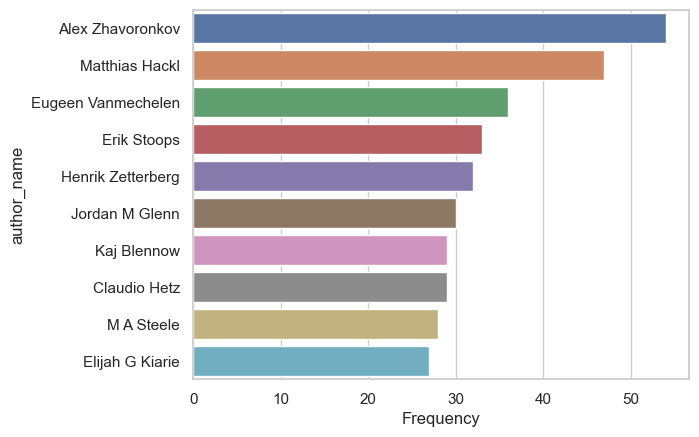

In [26]:
make_barplot(authors_dataframe_final,"author_name")

# sepearte the authors into affliated to the company and not affliated to the company

# keyword clean and create a df for users to match keywords and searched abstracts 

## first use keywords column from CSV and clean it then change CSV, make sure display is good
## create a large map of keyword and index of paper related to it
## then combine all keywords into a list and take a set - this list will give users options to search
### then match the searched keywords from st multiselect to a new list and take reverse index and display those papers

In [7]:
def read_data(dataframe):
    """Read the data from local."""
    data = dataframe.copy(deep=True)
    # datetime conversation for display
    data['publication_date'] = pd.to_datetime(data['publication_date'])
    data['publication_date'] = data['publication_date'].dt.date
    # to capitalize each row in the company_name column.
    data['company_name'] = data['company_name'].str.capitalize()
    return data


In [255]:
df_clean_noauthors2 = df_clean_papers.drop(columns=['authors'])

In [256]:
dataframe = read_data(df_clean_noauthors2)

In [257]:
def clean_keywords_strings(df:pd.DataFrame) -> pd.DataFrame:
    df = df_clean_noauthors2.copy(deep=True)
    keywords_list = []
    for i in range(len(df['keywords'])):
        keywords_list.append(df['keywords'][i].split(' ,'))
    df['keywords'] = keywords_list
    return df
def clean_keywords(row):
    keywords_list = []
    for i in row:
        i = (i.replace('"',''))
        keywords_list.append(i)
    return keywords_list

# execute clean keywords

In [379]:
df_final_abstracts_clean = clean_keywords_strings(dataframe)

In [380]:
df_final_abstracts_clean['keywords'] = df_final_abstracts_clean['keywords'].apply(clean_keywords)

In [381]:
df_final_abstracts_clean['keywords'] = df_final_abstracts_clean['keywords'].apply(lambda x: [item for item in x if item != ''])

In [382]:
df_final_abstracts_clean = df_final_abstracts_clean.reset_index(drop=True)

In [409]:
df_final_abstracts_clean

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi
0,fauna bio,36420970,Microvesicle release from inner segments of he...,"[Microvesicle, Mitochondria, Photoreceptor, Re...",2022-11-25,Many inherited visual diseases arise from muta...,Disease models & mechanisms,10.1242/dmm.049871
1,fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"[Microvesicle, Mitochondria, Photoreceptor, Re...",2022-04-29,Behavioral genetics in dogs has focused on mod...,"Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...
2,fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"[ARE binding proteins, AU-rich element (ARE), ...",2021-02-05,Hibernation is a physiological and behavioral ...,Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...
3,fauna bio,32734172,Veterinary informatics: forging the future bet...,"[informatics, medicine, one health, translatio...",2020-08-01,This manuscript reviews the current state of v...,JAMIA open,10.1093/jamiaopen/ooaa005
4,fauna bio,32569327,FasTag: Automatic text classification of unstr...,"[informatics, medicine, one health, translatio...",2020-06-23,Unstructured clinical narratives are continuou...,PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...
...,...,...,...,...,...,...,...,...
3135,brainstorm cell therapeutics,36113170,Evaluation of neurotrophic factor secreting me...,"[Progressive multiple sclerosis, biomarker, ce...",2022-09-17,Autologous mesenchymal stem cell neurotrophic ...,"Multiple sclerosis (Houndmills, Basingstoke, E...",10.1177/13524585221122156
3136,brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"[ALSFRS-R, amyotrophic lateral sclerosis, biom...",2021-12-11,Amyotrophic lateral sclerosis (ALS) is a fatal...,Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...
3137,brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"[Acute respiratory distress syndrome, COVID-19...",2021-01-21,One of the most severe complications of the cu...,Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...
3138,brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"[amyotrophic lateral sclerosis, biomarkers, cl...",2020-01-04,Amyotrophic lateral sclerosis (ALS) is a debil...,Muscle & nerve,10.1002/mus.26801


# now create a function for user to give a list of keywords that returns dataframe of abstracts that matches the query

In [306]:
""" function that combines a column of lists in dataframe to a large list """
def combine_list_column(df,column):
    df_copy = df.copy(deep=True)
    list_of_lists = df_copy[column].tolist()
    list_of_lists = [item for sublist in list_of_lists for item in sublist]
    return list(set(list_of_lists)) #drops duplicates

In [308]:
list_combined_keywords = combine_list_column(df_final_abstracts_clean,'keywords')

In [322]:
""" function that converts a list of strings sperated by comma into a list each strings"""
def convert_list_of_strings_to_list(list_words:list)->list:
    list_output = []
    for text in list_words:
        text = text.split(',')
        for word in text:
            word = word.strip()
            list_output.append(word)
    return list_output

In [412]:
(convert_list_of_strings_to_list(list_combined_keywords))

['COVID-19',
 'COVID-19 vaccine',
 'Delivery',
 'Neonatal',
 'Pregnancy',
 'mRNA vaccine',
 "Johne's disease",
 'MAP infection',
 'cattle',
 'disease resistance',
 'paratuberculosis',
 'Aging',
 'Cancer',
 'Mononuclear cell leukemia',
 'Climate-change ecology',
 'Ecological modelling',
 'Marine biology',
 'CARS',
 'Raman',
 'coherent Raman',
 'deuterium',
 'isotopes',
 'MSC',
 'cartilage tissue engineering',
 'disease-modifying OA drug',
 'osteoarthritis',
 'senescence',
 'senolytic',
 'Blastoderm',
 'Chicken',
 'Egg storage',
 'Prolonged storage',
 'SPIDES',
 'Transcriptome',
 'Adsorption dynamics',
 'Air-liquid interface',
 'Brewster Angle Microscopy',
 'Monoclonal antibodies',
 'Protein particles',
 'Surfactant',
 'Gompertz law',
 'biological age acceleration (BAA)',
 'personalized interventions',
 'public health',
 'resilience',
 'Latin America',
 'brain health',
 'capacity building',
 'dementia',
 'networking',
 'translational research',
 'ALS',
 'SOD1 mutations',
 'amyotrophic la

In [373]:
import pickle 
#pickle the keywords for first all abstracts 
with open("/Users/paritoshmacmini/Documents/antiagingintegratedinformationsystem/antiaging/keywords.pickle", "wb") as h:
    pickle.dump((convert_list_of_strings_to_list(list_combined_keywords)), h)
    

In [413]:
len(convert_list_of_strings_to_list(list_combined_keywords))

13871

In [361]:
""" function that creates a random list of n elements from a long list"""
import random
def random_list(list,n):
    random_list = []
    for i in range(n):
        random_list.append(random.choice(list))
    return random_list

In [362]:
test_list = random_list((convert_list_of_strings_to_list(list_combined_keywords)),10)

In [363]:
test_list

['transcriptomics',
 'dietary exposure assessment',
 'MCMCglmm',
 'NOD mice',
 'anticalin',
 'NF-κB',
 'Mortality',
 'co-synthesis',
 'MMPs',
 'precision feeding']

In [364]:

def find_indexes_of_matching_keywords(list_of_keywords,df,column):
    """" function that takes in a input list of strings, a dataframe and a column containing 
    lists as input and returns indexes of rows that match elements in the input list with 
    elements in lists in the column"""
    """match a string.
    :parameter
        :param column: string - name of column containing lists of text to match
        :param list_of_keywords: list - list of keywords to match
        :param df: dataframe - dataframe containing column
    :return
        index list
    note -     df must contain column titled 'keywords' and '' supplied with keyword list this function returns a list of indexes and matched words
    that contains the given keywords in a form of list """

    indexes = []
    matched_words = []
    df_copy = df.copy(deep=True)
    df_copy[column] = df_copy[column].apply(lambda x: [item.lower() for item in x])
    list_of_keywords = [item.lower() for item in list_of_keywords]
    for i in range(len(df_copy[column])):
        for p in list_of_keywords:
            for j in range(len(df_copy[column][i])):
                    if p in df[column][i][j]:
                         indexes.append(i)
                         matched_words.append((p,df[column][i][j]))
    return indexes, matched_words

In [371]:
test_list[2:4]

['MCMCglmm', 'NOD mice']

In [372]:
find_indexes_of_matching_keywords(test_list[2:4],df_final_abstracts_clean,'keywords')

([], [])

In [397]:

def remove_rows(df,column,word):
    # used to remove titles that contain the word correction from df_final_abstracts_clean
    """ summary: input param - dataframe, column and word to remove from the column 
    output - dataframe with rows not containing the word input """
    df_copy = df.copy(deep=True)
    df_copy[column] = df_copy[column].str.lower()
    index_to_exclude = []
    for title_num in range(len(df_copy[column])):
        title_list = df_copy[column][title_num].split()
        for each_word in title_list:
            if word == each_word:
                index_to_exclude.append(title_num)
                
    exclude_df = df_copy.index.isin(index_to_exclude)  
    return df_copy[~exclude_df]

In [403]:
df_final_abstracts_clean.to_csv('final_database_of_papers.csv')

In [398]:
df_final_abstracts_clean_new = remove_rows(df_final_abstracts_clean,'title','correction')

In [399]:
df_final_abstracts_clean_new = df_final_abstracts_clean_new.reset_index(drop=True)

In [402]:
df_final_abstracts_clean

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi
0,fauna bio,36420970,Microvesicle release from inner segments of he...,"[Microvesicle, Mitochondria, Photoreceptor, Re...",2022-11-25,Many inherited visual diseases arise from muta...,Disease models & mechanisms,10.1242/dmm.049871
1,fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"[Microvesicle, Mitochondria, Photoreceptor, Re...",2022-04-29,Behavioral genetics in dogs has focused on mod...,"Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...
2,fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"[ARE binding proteins, AU-rich element (ARE), ...",2021-02-05,Hibernation is a physiological and behavioral ...,Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...
3,fauna bio,32734172,Veterinary informatics: forging the future bet...,"[informatics, medicine, one health, translatio...",2020-08-01,This manuscript reviews the current state of v...,JAMIA open,10.1093/jamiaopen/ooaa005
4,fauna bio,32569327,FasTag: Automatic text classification of unstr...,"[informatics, medicine, one health, translatio...",2020-06-23,Unstructured clinical narratives are continuou...,PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...
...,...,...,...,...,...,...,...,...
3135,brainstorm cell therapeutics,36113170,Evaluation of neurotrophic factor secreting me...,"[Progressive multiple sclerosis, biomarker, ce...",2022-09-17,Autologous mesenchymal stem cell neurotrophic ...,"Multiple sclerosis (Houndmills, Basingstoke, E...",10.1177/13524585221122156
3136,brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"[ALSFRS-R, amyotrophic lateral sclerosis, biom...",2021-12-11,Amyotrophic lateral sclerosis (ALS) is a fatal...,Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...
3137,brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"[Acute respiratory distress syndrome, COVID-19...",2021-01-21,One of the most severe complications of the cu...,Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...
3138,brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"[amyotrophic lateral sclerosis, biomarkers, cl...",2020-01-04,Amyotrophic lateral sclerosis (ALS) is a debil...,Muscle & nerve,10.1002/mus.26801


In [ ]:
#usage of above functions examples 
#list_combined_keywords = combine_list_column(df_final_abstracts_clean,'keywords')
#list_combined_keywords_final =(convert_list_of_strings_to_list(list_combined_keywords))
#find_indexes_of_matching_keywords(test_list[2:4],df_final_abstracts_clean,'keywords')
#display_dataframe_withindex(df_final_abstracts_clean,find_indexes_of_matching_keywords(test_list,df_final_abstracts_clean,'keywords')[0])


# test keywords

In [1]:
def find_indexes_of_matching_keywords(list_of_keywords,df,column):
    """" function that takes in a input list of strings, a dataframe and a column containing 
    lists as input and returns indexes of rows that match elements in the input list with 
    elements in lists in the column"""
    """match a string.
    :parameter
        :param column: string - name of column containing lists of text to match
        :param list_of_keywords: list - list of keywords to match
        :param df: dataframe - dataframe containing column
    :return
        index list"""

    indexes = []
    matched_words = []
    df_copy = df.copy(deep=True)
    df_copy[column] = df_copy[column].apply(lambda x: [item.lower() for item in x])
    list_of_keywords = [item.lower() for item in list_of_keywords]
    for i in range(len(df_copy[column])):
        for p in list_of_keywords:
            for j in range(len(df_copy[column][i])):
                    if p in df[column][i][j]:
                         indexes.append(i)
                         matched_words.append((p,df[column][i][j]))
    return indexes, matched_words


In [9]:
from ast import literal_eval
def read_data(data="data/publications/final_database_of_papers.csv"):
    """Read and process the data from local to avoid errors 
    ['company_name', 'article_id', 'title', 'keywords', 'publication_date',
       'abstract', 'journal', 'doi'] are columns that are MUST in order to run the app"""
    try:
        data = pd.read_csv(data,index_col=0)
        #for some reason keyword lists are getting converted into strings - I have to stop storing data as csv 
        data['keywords'] = data['keywords'].apply(lambda x: literal_eval(x) if "[" in x else x)
        # datetime conversation for display
        data['publication_date'] = pd.to_datetime(data['publication_date'])
        data['publication_date'] = data['publication_date'].dt.date
        # to capitalize each row in the company_name column.
        data['company_name'] = data['company_name'].str.capitalize()
        return data
    except Exception as e:
        print(e)
        return None

In [173]:
data = read_data()

/var/folders/qh/mr12tldn3g76pnlklr517bsm0000gn/T/ipykernel_91716/2030604870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[column][i] = 'Nothing here'


In [170]:
data['keywords'][0]

['Microvesicle, Mitochondria, Photoreceptor, Retina, Rhodopsin, Vision']

In [85]:
data.columns

Index(['company_name', 'article_id', 'title', 'keywords', 'publication_date',
       'abstract', 'journal', 'doi'],
      dtype='object')

In [175]:
#convert string of list to keywords:
try:
    for i in range(len(data['keywords'])):
        for j in range(len(data['keywords'][i])):
            sample_list = data['keywords'][i][j].split(', ')
            data['keywords'][i]= sample_list
            
except:
    pass
        

/var/folders/qh/mr12tldn3g76pnlklr517bsm0000gn/T/ipykernel_91716/2985231351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keywords'][i]= sample_list


In [177]:
"""  change empty double lists in a column to 'Nothing here' """ 

def change_empty_lists_to_string(df,column):
    df_copy = df.copy(deep=True)
    for i in range(len(df_copy[column])):
        if df_copy[column][i] == ['[]']:
            df_copy[column][i] = 'Nothing here'
    return df_copy

In [178]:
data = change_empty_lists_to_string(data,'keywords')

In [190]:
def list_tostring(list):
    """convert list to string"""
    return ', '.join(list)

In [193]:
data['keyword_display'] = data['keywords'].apply(list_tostring)

In [194]:
data['keyword_display'][0]

'Microvesicle, Mitochondria, Photoreceptor, Retina, Rhodopsin, Vision'

In [197]:
data = data.drop(columns=['test'])

In [199]:
data

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi,keyword_display
0,Fauna bio,36420970,Microvesicle release from inner segments of he...,"[Microvesicle, Mitochondria, Photoreceptor, Re...",2022-11-25,Many inherited visual diseases arise from muta...,Disease models & mechanisms,10.1242/dmm.049871,"Microvesicle, Mitochondria, Photoreceptor, Ret..."
1,Fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"[Microvesicle, Mitochondria, Photoreceptor, Re...",2022-04-29,Behavioral genetics in dogs has focused on mod...,"Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...,"Microvesicle, Mitochondria, Photoreceptor, Ret..."
2,Fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"[ARE binding proteins, AU-rich element (ARE), ...",2021-02-05,Hibernation is a physiological and behavioral ...,Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...,"ARE binding proteins, AU-rich element (ARE), I..."
3,Fauna bio,32734172,Veterinary informatics: forging the future bet...,"[informatics, medicine, one health, translatio...",2020-08-01,This manuscript reviews the current state of v...,JAMIA open,10.1093/jamiaopen/ooaa005,"informatics, medicine, one health, translation..."
4,Fauna bio,32569327,FasTag: Automatic text classification of unstr...,"[informatics, medicine, one health, translatio...",2020-06-23,Unstructured clinical narratives are continuou...,PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...,"informatics, medicine, one health, translation..."
...,...,...,...,...,...,...,...,...,...
3135,Brainstorm cell therapeutics,36113170,Evaluation of neurotrophic factor secreting me...,"[Progressive multiple sclerosis, biomarker, ce...",2022-09-17,Autologous mesenchymal stem cell neurotrophic ...,"Multiple sclerosis (Houndmills, Basingstoke, E...",10.1177/13524585221122156,"Progressive multiple sclerosis, biomarker, cel..."
3136,Brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"[ALSFRS-R, amyotrophic lateral sclerosis, biom...",2021-12-11,Amyotrophic lateral sclerosis (ALS) is a fatal...,Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...,"ALSFRS-R, amyotrophic lateral sclerosis, bioma..."
3137,Brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"[Acute respiratory distress syndrome, COVID-19...",2021-01-21,One of the most severe complications of the cu...,Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...,"Acute respiratory distress syndrome, COVID-19,..."
3138,Brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"[amyotrophic lateral sclerosis, biomarkers, cl...",2020-01-04,Amyotrophic lateral sclerosis (ALS) is a debil...,Muscle & nerve,10.1002/mus.26801,"amyotrophic lateral sclerosis, biomarkers, cli..."


In [202]:
data.to_excel('data/publications/final_database_of_papers.xlsx')

In [96]:
data[data['title']=='Senescence atlas reveals an aged-like inflamed niche that blunts muscle regeneration.']

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi
490,Altos labs,36544018,Senescence atlas reveals an aged-like inflamed...,Nothing here,2022-12-22,Tissue regeneration requires coordination betw...,Nature,10.1038/s41586-022-05535-x\n10.1016/j.stem.202...


In [212]:
def read_data(data="data/publications/final_database_of_papers.xlsx"):
    """Read and process the data from local to avoid errors 
    ['company_name', 'article_id', 'title', 'keywords', 'publication_date',
       'abstract', 'journal', 'doi'] are columns that are MUST in order to run the app"""
    try:
        data = pd.read_excel(data,index_col=0)
        #for some reason keyword lists are getting converted into strings - I have to stop storing data as csv 
        data['keywords'] = data['keywords'].apply(lambda x: literal_eval(x) if "[" in x else x)
        data = change_empty_lists_to_string(data,'keywords') #sorry next data version update will fix this
        # datetime conversation for display
        data['publication_date'] = pd.to_datetime(data['publication_date'])
        data['publication_date'] = data['publication_date'].dt.date
        # to capitalize each row in the company_name column.
        data['company_name'] = data['company_name'].str.strip()
        data['company_name'] = data['company_name'].str.capitalize()
        return data
    except Exception as e:
        print(e)
        return None

In [213]:
data = read_data()

In [214]:
comapny_list = list(set(data['company_name'].to_list()))

In [215]:
comapny_list

['Chromadex',
 'Minovia therapeutics',
 'Juvenescence',
 'Yuva biosciences',
 'Amprion',
 'Beiwe health',
 'Lyceum pharmaceuticals',
 'Siwa therapeutics',
 'Biochange ltd',
 'Insilico medicine',
 'Longeveron',
 'Eternans',
 'Tamirna',
 'Altoida',
 'Bioage labs',
 'Denali therapeutics',
 'Telocyte',
 'Age labs',
 'Yumanity therapeutics',
 'New limit',
 'Amazentis',
 'Mitobridge',
 'Alkahest',
 'Mitokinin',
 'Napa therapeutics',
 'Tranquis therapeutics',
 'Cambrian biopharma',
 'Intervene immune',
 'Deciduous therapeutics',
 'Lineage cell therapeutics',
 'Neurotrack',
 'Equator therapeutics',
 'Altos labs',
 'Life length',
 'Ridgeline therapeutics',
 'Alchemab therapeutics',
 'Dorian therapeutics',
 'Ichor life sciences was therapeutics',
 'Biosens',
 'Chronomics',
 'Genflow biosciences',
 'North inc',
 'Gordian biotechnology',
 'Gensight biologics',
 'Numeric biotech',
 'Fountain therapeutics',
 'Nusirt',
 'Aelan cell technologies',
 'Cyclarity was underdog',
 'Rejuveron life sciences a

In [97]:

def combine_list_column(df,column):
    """ function that combines a column of lists in dataframe to a large list """
    df_copy = df.copy(deep=True)
    list_of_lists = df_copy[column].tolist()
    list_of_lists = [item for sublist in list_of_lists for item in sublist]
    return list(set(list_of_lists)) #drops duplicates


def convert_list_of_strings_to_list(list_words:list)->list:
    """ function that converts a list of strings sperated by comma into a list each strings"""
    list_output = []
    for text in list_words:
        text = text.split(',')
        for word in text:
            word = word.strip()
            list_output.append(word)
    return list_output


In [98]:
list_combined_keywords = combine_list_column(data,'keywords')
list_combined_keywords_final =(convert_list_of_strings_to_list(list_combined_keywords))

In [106]:
len(list_combined_keywords_final)

10042

In [101]:


def remove_duplicates(list_of_strings):
    """ function that takes input of a list of strings, 
    uses index to iterate over each string lowers each string 
    and returns a list of strings with no duplicates, does not modify the original strings
    an exhaustive search to remove duplicates using index of list and list of string"""

    list_of_strings_copy = list_of_strings
    try:
        for i in range(len(list_of_strings)):
            list_of_strings_copy[i] = list_of_strings_copy[i].lower()
            word = list_of_strings_copy[i]
            for j in range(len(list_of_strings_copy)):
                if word == list_of_strings_copy[j]:
                    list_of_strings.pop(i)
                    j+=1
    except Exception as e:
        print(e)
    return list_of_strings

In [103]:
""" convert an empty string in list of strings to 'Nothing here' """

def convert_empty_string_to_string(list_of_strings):
    list_of_strings_copy = list_of_strings
    for i in range(len(list_of_strings_copy)):
        if list_of_strings_copy[i] == '':
            list_of_strings_copy[i] = 'Nothing here'
    return list_of_strings_copy

In [144]:
list_to_pickle = list((convert_empty_string_to_string(list_combined_keywords_final)))

In [200]:
import pickle
with open("/Users/paritoshmacmini/Desktop/personal_projects/antiaging_app/pickle_files/keyword_final.pickle", "wb") as h:
    pickle.dump(list_to_pickle, h)
    

In [174]:
def find_indexes_of_matching_keywords(list_of_keywords,df,column):
    """" function that takes in a input list of strings, a dataframe and a column containing 
    lists as input and returns indexes of rows that match elements in the input list with 
    elements in lists in the column
    match a string.
    :parameter
        :param column: string - name of column containing lists of text to match
        :param list_of_keywords: list - list of keywords to match
        :param df: dataframe - dataframe containing column
    :return
        index list"""

    indexes = []
    matched_words = []
    df_copy = df.copy(deep=True)
    df_copy[column] = df_copy[column].apply(lambda x: [item.lower() for item in x])
    list_of_keywords = [item.lower() for item in list_of_keywords]
    for i in range(len(df_copy[column])):
        for p in list_of_keywords:
            for j in range(len(df_copy[column][i])):
                    if p in df[column][i][j]:
                         indexes.append(i)
                         matched_words.append((p,df[column][i][j]))
    return indexes, matched_words



def display_dataframe_withindex(df,indexes):
    """Display dataframe."""
    df_display = df.iloc[indexes]
    return df_display.reset_index(drop=True)

In [126]:
indexes, words = find_indexes_of_matching_keywords(list_to_pickle[1001:1012],read_data(),'keywords')

[('microbiology', 'microbiology'),
 ('reactive oxygen species', 'reactive oxygen species'),
 ('microbiology', 'environmental microbiology'),
 ('microbiology', 'environmental microbiology'),
 ('reactive oxygen species', 'reactive oxygen species'),
 ('reactive oxygen species', 'reactive oxygen species'),
 ('reactive oxygen species', 'reactive oxygen species'),
 ('reactive oxygen species', 'reactive oxygen species'),
 ('microbiology', 'sociomicrobiology'),
 ('aflatoxin', 'aflatoxins'),
 ('microbiology', 'Polar microbiology'),
 ('spine', 'dendritic spine'),
 ('microbiology', 'milk microbiology'),
 ('data science', 'data science'),
 ('aflatoxin', 'aflatoxin B1'),
 ('remediation', 'remediation'),
 ('microbiology', 'veterinary microbiology'),
 ('food intake', 'food intake'),
 ('food intake', 'food intake'),
 ('reactive oxygen species', 'reactive oxygen species'),
 ('reactive oxygen species', 'reactive oxygen species')]

In [127]:
display_dataframe_withindex(read_data(),indexes)

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi
0,Intraclear biologics,36239139,An emerging field: Post-translational modifica...,"[bioinformatics, cell biology, metaproteomics,...",1970-01-01,Post-translational modifications (PTMs) play a...,Proteomics,10.1002/pmic.202100389
1,Elysium health,30352021,Oxidative stress and antioxidants in the patho...,"[intracellular redox state, metastases, reacti...",1970-01-01,The high number of somatic mutations in the me...,Biological chemistry,10.1515/hsz-2018-0327
2,Gero,34227830,Metabolic Differentiation of Co-occurring Accu...,"[EBPR, environmental microbiology, genomics, m...",1970-01-01,Natural microbial communities consist of close...,mSystems,10.1128/mSystems.00474-21\n10.1038/30965\n10.1...
3,Gero,34112687,Inhibitors of bacterial H,"[EBPR, environmental microbiology, genomics, m...",1970-01-01,Emergent resistance to all clinical antibiotic...,"Science (New York, N.Y.)",10.1126/science.abd8377
4,Unify pharmaceuticals,29354647,Guidelines and recommendations on yeast cell d...,"[Saccharomyces cerevisiae, accidental cell dea...",1970-01-01,Elucidating the biology of yeast in its full c...,"Microbial cell (Graz, Austria)",10.15698/mic2018.01.607\n10.3389/fmicb.2015.01...
5,Unify pharmaceuticals,29321683,Dual function of thalamic low-vigilance state ...,"[Saccharomyces cerevisiae, accidental cell dea...",1970-01-01,During inattentive wakefulness and non-rapid e...,Nature reviews. Neuroscience,10.1038/nrn.2017.151
6,Retrotope,32113652,Polyunsaturated Fatty Acid Deuteration against...,"[deuterium, lipid membrane, lipid peroxidation...",1970-01-01,Oxidative stress is a common feature of geneti...,Trends in pharmacological sciences,10.1016/j.tips.2020.01.010
7,Retrotope,30851224,Threshold protective effect of deuterated poly...,"[conjugated dienes, deuterated polyunsaturated...",1970-01-01,Autoxidation of polyunsaturated fatty acids (P...,The FEBS journal,10.1111/febs.14807
8,Shift biosciences,35583321,Bacterial Quorum Sensing Allows Graded and Bim...,"[bacterial communication, quorum sensing, reac...",1970-01-01,Quorum sensing (QS) is a mechanism of cell-cel...,mBio,10.1128/mbio.00745-22\n10.1101/cshperspect.a01...
9,Shift biosciences,35368141,"Water safety, antifungal-resistant aflatoxigen...","[aflatoxins, antifungal resistance, drinking w...",1970-01-01,To investigate hand-dug well water used for dr...,Journal of applied microbiology,10.1111/jam.15559


In [121]:
list_to_pickle[1001:1012]

['Hydroxyapatite',
 'microbiology',
 'NLRP3',
 'Food intake',
 'Optimal temperature',
 'data science',
 'Spine',
 'NetB toxin',
 'Aflatoxin',
 'Reactive oxygen species',
 'remediation']

In [ ]:
""" function to remvoe empty strings from a pandas column of strings """

def remove_empty_strings(df,column):
    df_copy = df.copy(deep=True)
    df_copy[column] = df_copy[column].apply(lambda x: x if x != '' else None)
    df_copy = df_copy.dropna(subset=[column])
    return df_copy

In [222]:
def read_data(data="data/publications/final_database_of_papers.xlsx"):
    """Read and process the data from local to avoid errors 
    ['company_name', 'article_id', 'title', 'keywords', 'publication_date',
       'abstract', 'journal', 'doi'] are columns that are MUST in order to run the app"""
    try:
        data = pd.read_excel(data,index_col=0)
        #for some reason keyword lists are getting converted into strings - I have to stop storing data as csv 
        data['keywords'] = data['keywords'].apply(lambda x: literal_eval(x) if "[" in x else x)
        data = change_empty_lists_to_string(data,'keywords') #sorry next data version update will fix this
        # datetime conversation for display
        data['publication_date'] = pd.to_datetime(data['publication_date'])
        data['publication_date'] = data['publication_date'].dt.date
        # to capitalize each row in the company_name column.
        data['company_name'] = data['company_name'].str.strip()
        data['company_name'] = data['company_name'].str.capitalize()
        return data
    except Exception as e:
        print(e)
        return None

In [226]:
df = read_data()

In [236]:
df_test = df[df['company_name']=='Altos labs']

In [239]:
df_test['keywords'][490]

'Nothing here'

In [233]:
(df_test[df_test['title'] =='Development and validation of methods that enable high-quality droplet digital PCR and hematological profiling data from microvolume blood samples.']['keywords'][119])

['LLOQ',
 'LOD',
 'blood sampling',
 'cell and gene therapy',
 'ddPCR',
 'hematological profiling',
 'method validation',
 'pharmacokinetic study',
 'preclinical study']

In [234]:
""" function to highlight a string in a dataframe column """

def highlight_string(df,column,string):
    df_copy = df.copy(deep=True)
    df_copy[column] = df_copy[column].apply(lambda x: x if string not in x else x.replace(string,f'<span style="background-color: yellow">{string}</span>'))
    return df_copy

In [240]:
def authors_data(data="data/publications/authors_dataframe.csv"):
    """Read the data from local."""
    data = pd.read_csv(data,index_col=0)
    return data

In [241]:
authors_dataframe = authors_data()

In [242]:
authors_dataframe

,lastname,firstname,initials,affiliation,company_name,pubmed_id,title,author_name
0,Lewis,Tylor R,TR,"Department of Ophthalmology, Duke University M...",fauna bio,36420970,Microvesicle release from inner segments of he...,Tylor R Lewis
1,Phan,Sebastien,S,National Center for Microscopy and Imaging Res...,fauna bio,36420970,Microvesicle release from inner segments of he...,Sebastien Phan
2,Kim,Keun-Young,KY,National Center for Microscopy and Imaging Res...,fauna bio,36420970,Microvesicle release from inner segments of he...,Keun-Young Kim
3,Jha,Isha,I,National Center for Microscopy and Imaging Res...,fauna bio,36420970,Microvesicle release from inner segments of he...,Isha Jha
4,Castillo,Carson M,CM,"Department of Ophthalmology, Duke University M...",fauna bio,36420970,Microvesicle release from inner segments of he...,Carson M Castillo
...,...,...,...,...,...,...,...,...
33228,Kaspi,Haggai,H,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Haggai Kaspi
33229,Mehra,Munish,M,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Munish Mehra
33230,Aricha,Revital,R,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Revital Aricha
33231,Gothelf,Yael,Y,From Massachusetts General Hospital Neurologic...,brainstorm cell therapeutics,31740545,"NurOwn, phase 2, randomized, clinical trial in...",Yael Gothelf


In [254]:
test_case = (authors_dataframe[authors_dataframe['company_name']=='denali therapeutics']).reset_index(drop=True)

In [255]:
case_1 = test_case[test_case['pubmed_id']==33931790]

In [264]:
case_1 = case_1.reset_index(drop=True)

In [273]:
def highlight_company_auths(match_string,case_1):
    match_string = match_string.lower()
    match_index = []
    for i in range(len(case_1['affiliation'])):
        affiliation_string = (case_1['affiliation'][i]).lower()
        for j in match_string.split():
            if j in affiliation_string:
                if i not in match_index:
                    match_index.append(i)
            else:
                continue
    df_copy = case_1.copy(deep=True)
    df_copy.iloc[match_index] = df_copy.iloc[match_index].style.apply(lambda x: ["background: yellow"])
    return df_copy


In [275]:
test_final = highlight_company_auths('denali therapeutics',case_1)

In [1]:
test_final

NameError: name 'test_final' is not defined

In [277]:
""" highlight a specific row in a dataframe """

def highlight_row(df,row_index):
    df_copy = df.copy(deep=True)
    df_copy.iloc[row_index] = df_copy.iloc[row_index].style.apply(lambda x: ["background: yellow"])
    return df_copy

In [ ]:
import altair as alt
chart_data = 
data = pd.melt(chart_data.reset_index(), id_vars=["index"])

# Horizontal stacked bar chart
chart = (
    alt.Chart(data)
    .mark_bar()
    .encode(
        x=alt.X("value", type="quantitative", title=""),
        y=alt.Y("index", type="nominal", title=""),
        color=alt.Color("variable", type="nominal", title=""),
        order=alt.Order("variable", sort="descending"),
    )
).properties(height=700)

chart